# 分類問題ー単純な機械学習アルゴリズムの訓練

『Pythonによる機械学習プログラミング』2章

https://github.com/rasbt/python-machine-learning-book-3rd-edition

## パーセプトロンの学習アルゴリズムをPythonで実装してみる

パーセプトロンの特徴は、

- m次元の入力ベクトル **x** 、重みベクトル **w** の線形和を入力として受け取り
- 決定関数、あるいは活性化関数Φを適用して、出力値を決定する
- 活性化関数は、単位ステップ関数 unit step function を採用する

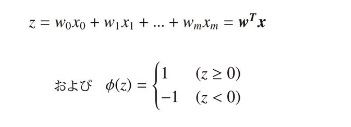

<br>

2次元の絵で表現するとこうなる。

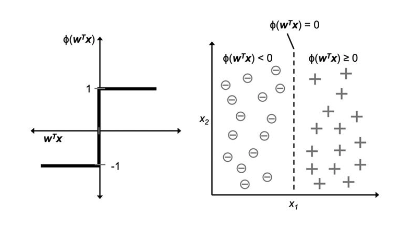

m=2として、決定境界は、

$$
    0 = w_1 * x_1 + w_2 * x_2 \\
    x_2 = -\frac{w_1}{w_2}x_1
$$

と表されるので、一次関数の線になる。線形分離可能な問題のみが対象となる。

真の意味で、まだ理解できていないのだが、i番目のデータでの学習ループにおける、j次元目の重みの更新式は以下のようになる。 

`{⊿w_j} = {学習率} * {正解値 - 予測値} * {x_j}`

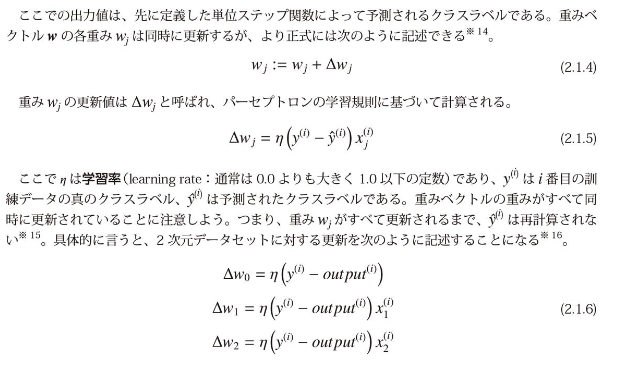

### Libraries

In [19]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set()

In [20]:
# 実装してみる
class Perceptron(object):
    """Perceptron classifier
    
    Params
    --------------
    eta : 学習率(0.0 ~ 1.0)
    n_iter : 訓練データの訓練回数
    seed : 重み初期化のための乱数シード
    
    Attributes
    --------------
    w_ : 適合後の重み 1d-array
    errors_ : 各エポックでの誤分類の数
    """
    def __init__(self, eta: float=0.01, n_iter: int=100, seed: int=1):
        self.eta = eta
        self.n_iter = n_iter
        self.seed = seed
    
    def net_input(self, X) -> float:
        """総入力（線形和）
            X: 1d-array
        """
        # w[0] はバイアス項。X_0 は1であると考えている。
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X) -> int:
        """推論
            X: 1d-array
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def _step_function(self, z: float=None, unit: int=1) -> int:
        return 1 * unit if z >= 0.0 else 0
    
    def fit(self, X, y):
        """学習
        X : array-like
            (r, c) = (n_samples, n_features)
        y : array-like
            (r, c) = (n_samples, 1)
        """
        rand_generator = np.random.RandomState(self.seed)
        # 重みはXの列数＋1次元（バイアスの分）
        self.w_ = rand_generator.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        
        # 1データ当たりの訓練回数分訓練を繰り返す
        for _ in range(self.n_iter):
            self.errors = []
            # 全サンプルについて訓練を実施
            for x_i, y_i in zip(X, y):
                y_out = self.predict(x_i)
                # 全featureについて重み更新
                delta_w_i_0 = self.eta * (y_i - y_out)
                delta_w_i_ = self.eta * (y_i - y_out) * x_i
                self.w_[0] += delta_w_i_0
                self.w_[1:] = self.w_[1:] + delta_w_i_
                # append error flg
                self.errors.append(1 if int(y_i - y_out) != 0 else 0)
            # 当該エポックに関するエラーの数をチェック
            err_bar = ['■'] * sum(self.errors)
            print(''.join(err_bar))
        return self

In [21]:
import random
X = np.array(np.random.randn(3000)).reshape(1000, 3)
y = random.choices([1, 0], k=10)

In [22]:
model = Perceptron()
model.fit(X, y)

■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■■■
■■■■■
■■■■■■
■■■■■■
■■■■■
■■■■■■■
■■■■■■■■
■■■■■■
■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■
■■■■■■
■■■■■■■
■■■■■
■■■■■■
■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■
■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■■
■■■■■
■■■■■■
■■■■■■■■
■■■■■■
■■■■■■
■■■■■■
■■■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■■■
■■■■■
■■■■■■■
■■■■■
■■■■■■
■■■■■■■■
■■■■■■
■■■■■■
■■■■■■
■■■■■■■
■■■■■■■
■■■■■■■■
■■■■■
■■■■■■
■■■■■■■
■■■■■
■■■■■■
■■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■
■■■■■■
■■■■■■
■■■■■■
■■■■■■
■■■■■■■■
■■■■■■
■■■■■■■■
■■■■■■
■■■■■■
■■■■■■
■■■■■■
■■■■■■■
■■■■■■■
■■■■■■
■■■■■■■
■■■■■■
■■■■■■
■■■■■■■
■■■■■■■■
■■■■■■
■■■■■■■■
■■■■■■
■■■■■
■■■■■■
■■■■■■■■


## パーセプトロン実装（答え）

In [37]:
class Perceptron_(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [24]:
ppn = Perceptron_(eta=0.1, n_iter=100)

X = np.array(np.random.randn(3000)).reshape(1000, 3)
y = random.choices([1, 0], k=10)

ppn.fit(X, y)

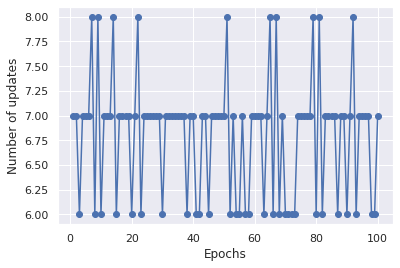

In [25]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

## Irisデータでパーセプトロンを学習させる

ただし、簡単のため、以下の制約をつける

- 特徴量は、「がく片の長さ」「花びらの長さ」の２つのみ
- ２値分類のため、「Setosa」「Versicolor」のみを対象とする


ただし、パーセプトロンも多クラス分類に応用可能。手法としては、One-vs-All / One-vs-Rest などと呼ぶ。

- 各クラスごとに2値分類モデルをつくり
- 対象クラスを陽性、それ以外を陰性として学習する

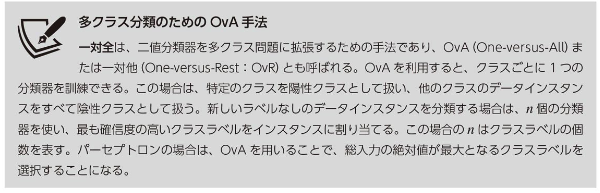

<br>

---

In [26]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df_iris = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df_iris.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<br>

- select cols
    - 0 : sepal len
    - 2 : petal len
- select rows
    - df[4] != Iris-virginica

In [27]:
train_df = df_iris.rename({0: 'sepal_len', 2: 'petal_len', 4: 'kind'}, axis='columns')

In [28]:
train_df_ = train_df[['sepal_len', 'petal_len', 'kind']].copy()

<AxesSubplot:xlabel='sepal_len', ylabel='petal_len'>

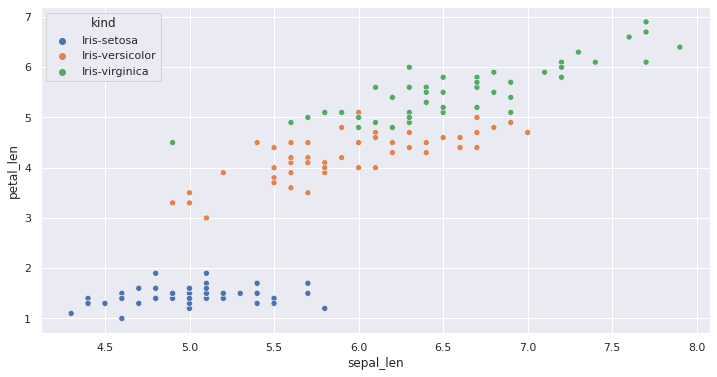

In [29]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()
sns.scatterplot(data=train_df_, x='sepal_len', y='petal_len', hue='kind', ax=ax)

In [30]:
train = train_df_[train_df_['kind'] != 'Iris-virginica'].copy()
y = np.where(train['kind'].values == 'Iris-setosa', 1, -1)
X = train[train.columns[:2]].values

<AxesSubplot:xlabel='sepal_len', ylabel='petal_len'>

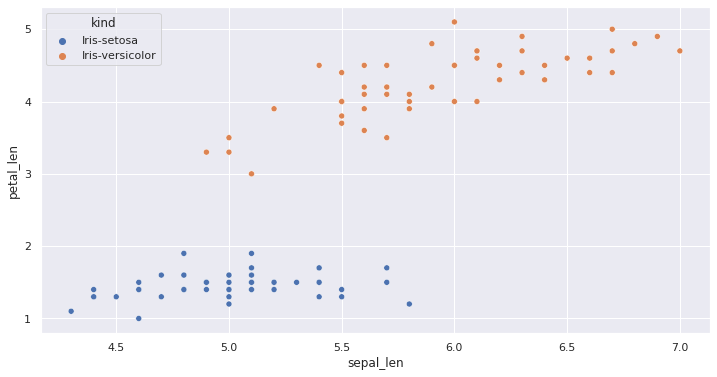

In [31]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()
sns.scatterplot(data=train, x='sepal_len', y='petal_len', hue='kind', ax=ax)

In [32]:
ppn = Perceptron_(eta=0.1, n_iter=20)
ppn.fit(X, y)

Text(0, 0.5, 'Number of updates')

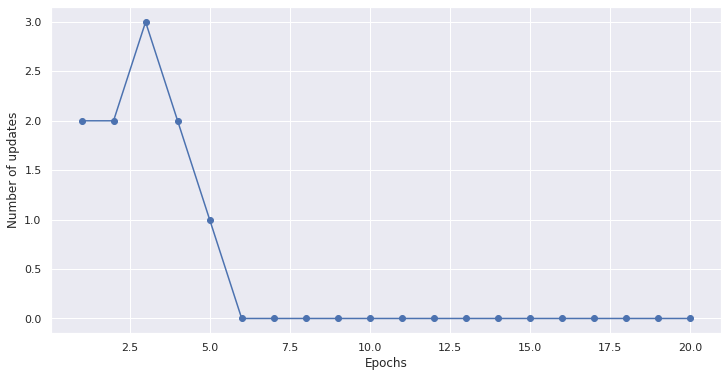

In [33]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()

ax.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Number of updates')

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

もし、ラベルを 1/0 にしていたら、50 に収束する（↓がその証拠）

<br>

In [34]:
y_alt = np.where(train['kind'].values == 'Iris-setosa', 1, 0)

Text(0, 0.5, 'Number of updates')

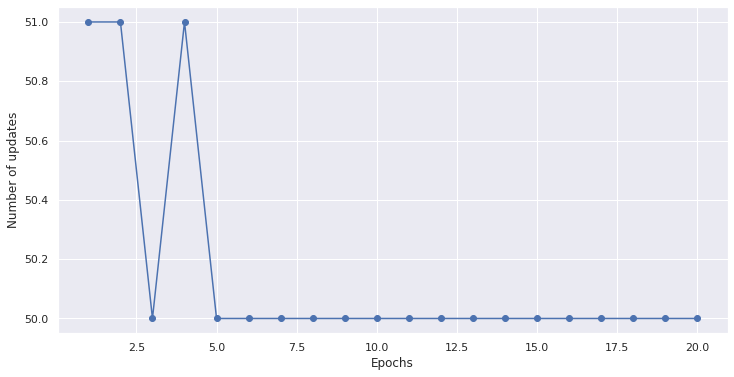

In [35]:
ppn_alt = Perceptron_(eta=0.1, n_iter=20)
ppn_alt.fit(X, y_alt)

fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()

ax.plot(range(1, len(ppn_alt.errors_) + 1), ppn_alt.errors_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Number of updates')

### Q: なぜ1/0にすると50に収束するのか説明せよ

fit関数の中では、エポックごとに以下のようなデータごとのfor文がある

---

```python
for _ in range(self.n_iter): # epoch
    errors = 0
    for xi, target in zip(X, y): # data
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
    self.errors_.append(errors)
return self
```

---

ここで、updateに値を格納する部分が更新式である。そこでは、predict()が呼ばれる。predictの中では線形和算出関数が呼ばれる。

---

```python
def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)
```

---

**predict は 1 or -1 を返すのに、targetには1 or 0 が入っている。**

ずばり答えはこれだ。
predict()が1or0を返すようにカスタマイズしたら、正解値が1/0にすることで学習が適切に進むはず。

↓↓↓↓（証拠）

In [40]:
class Perceptron__(Perceptron_):
    def fit_(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict_(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict_(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

Text(0, 0.5, 'Number of updates')

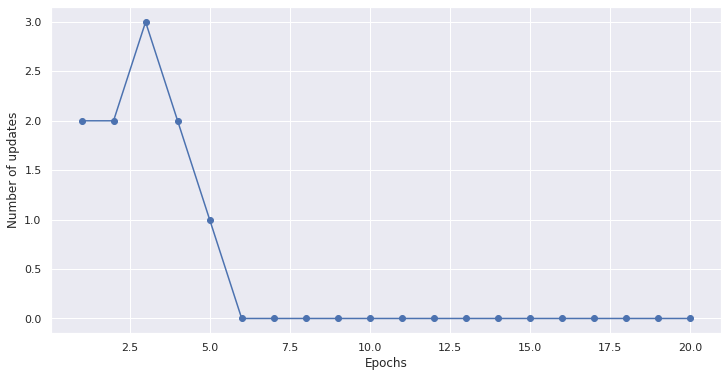

In [41]:
ppn_alt = Perceptron__(eta=0.1, n_iter=20)
ppn_alt.fit_(X, y_alt)

fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()

ax.plot(range(1, len(ppn_alt.errors_) + 1), ppn_alt.errors_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Number of updates')

### 決定境界のプロット

2次元なので、決定境界は一次関数の形になる。

$$
z = w^Tx = 0 \\
w_0 + w_1x_1 + w_2x_2 = 0 \\
x_2 = -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}
$$

In [42]:
# 学習済モデルで分離線を引いてみる
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

<ipython-input-42-a82494299168>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


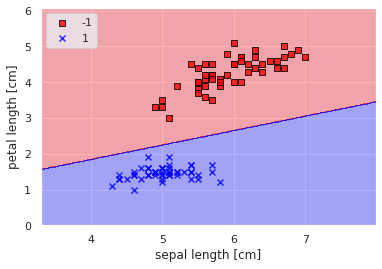

In [45]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

<font color=red size=10>**↓↓↓ここから！！！！**</font>

## ADALINE で学習する

ADALINEは、パーセプトロンの改造版である。改善したのは、 **「ステップ関数」→「活性化関数（線形）＋ステップ関数（非線形）」** という部分である。


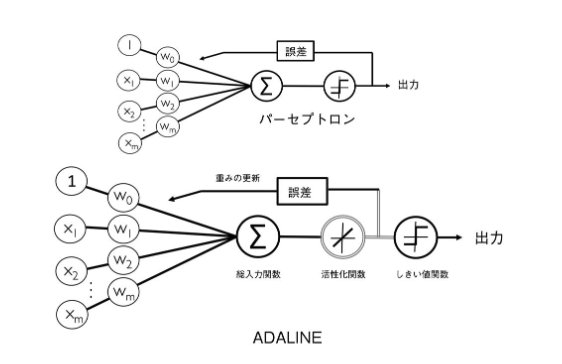

---

重要なポイントは、

- 活性化関数（コスト関数）は微分可能な形である → 解析的に変化率が計算できる
    - ADALINEでは、SSE（誤差平方和）を採用
- 活性化関数（コスト関数）は凸関数である → 勾配降下法が使える

↓↓↓↓こんな感じで⊿wを微分で表現できる↓↓↓↓

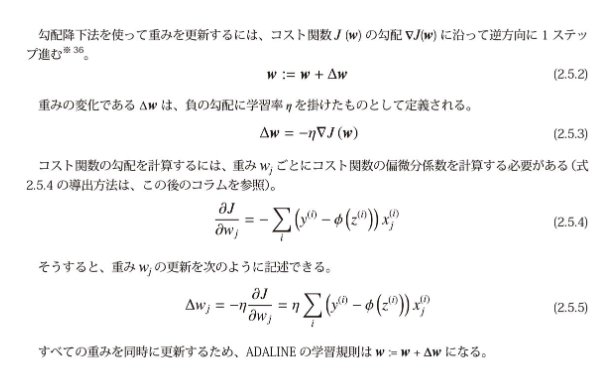

### ADALINE クラスの実装

パーセプトロンとの違い、でありADALINEのポイントとなるものは以下

1. 活性化関数として、activation メソッドが追加されたところ
    - activation自体は何もしていないが、この役割をつくり、切り出したところに意味がある
2. erros_ではなく、cost_に格納される
    - 誤差そのものではなく、コスト関数の値が入れられる

---

このあと解説するロジスティック回帰とは、`活性化関数（activation）` と `コスト関数（cost = (errors**2).sum() / 2.0）` だけが異なる。

In [46]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

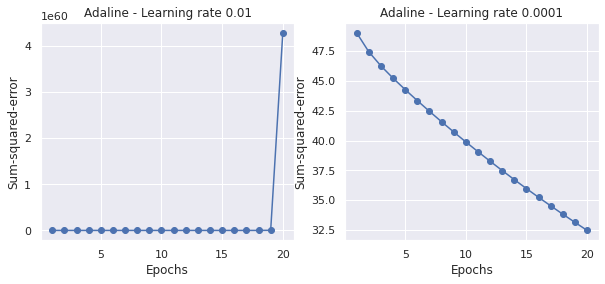

In [55]:
# パーセプトロンと同じノリで学習率0.01 とかにすると、コスト関数が増大して、収束しない
ada_test1 = AdalineGD(eta=0.01, n_iter=20).fit(X, y)
ada_test2 = AdalineGD(eta=0.0001, n_iter=20).fit(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(range(1, len(ada_test1.cost_) + 1), ada_test1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate 0.01')

ax[1].plot(range(1, len(ada_test2.cost_) + 1), ada_test2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

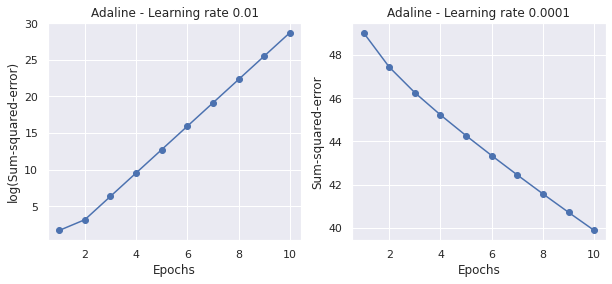

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

### ADALINEの学習結果から分かるポイント

1. 学習率が大きすぎると収束しない（大域的最小値を飛び越えて、行ったり来たりの繰り返し）
2. 学習率が小さければ、収束しやすくなるが、相当な数のエポックを回さなくてはならない

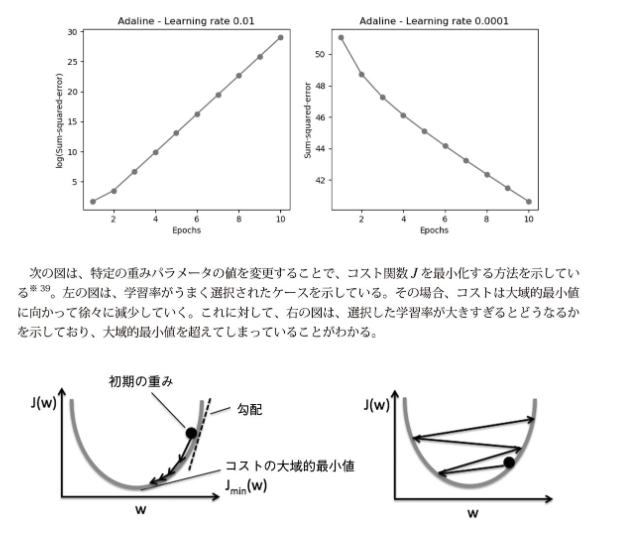

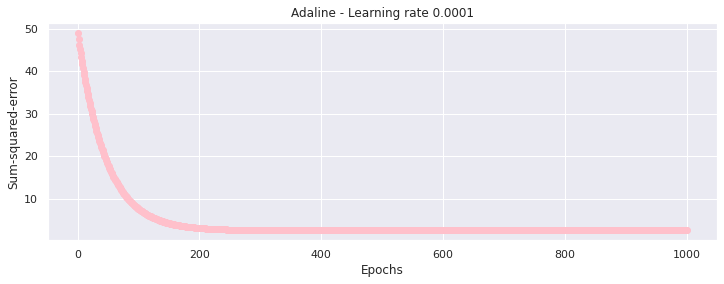

In [65]:
# ちなみに、学習率を0.0001にした時、エポック何回ぐらい回せばいいのだろう？　→　200回ぐらい
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

ada3 = AdalineGD(n_iter=1000, eta=0.0001).fit(X, y)
ax.plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o', color='pink')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

## 特徴量のスケーリングによる勾配降下法の改善

sklearnでlogistic_regressionするときとか、標準化することが定番だけど。あれはなぜなのか？という話。

イメージとしては、下記の図のような形で表現できるらしい。が、まだわかってない。



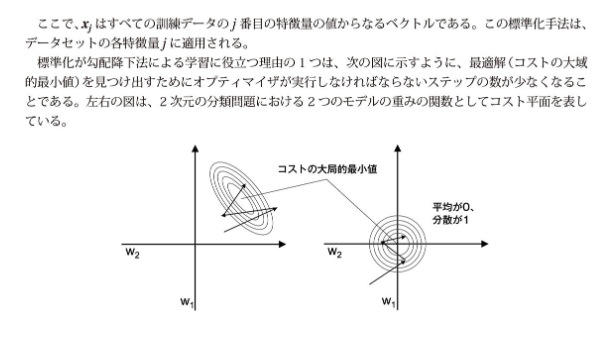

---

何がわからないのかというと

- そもそも、重み空間における円は何だ？
- 入力値（X）に対して標準化を行ったことと重み空間での円の変換ｎどういうつながりが有るのか分からない

ということ。一つずつ考えていこう

**1. そもそも、重み空間における円は何だ？**

これは、重みを更新する際に参照する勾配を上から見た図であろう。ということは、

$$
z = w_0 + w_1x_1 + w_2x_2 \\
z = (x_1)w_1 + (x_2)w_2 + w_0
$$

としたときの曲面zだ。…と思ったが違う。コスト関数J(w)だ。↓↓↓↓

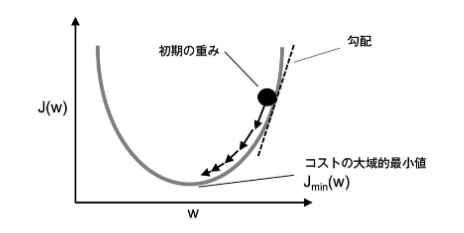

$$
J(\vec{w}) = \frac{1}{2} \sum_{i}{(y^{(i)} - \phi(z^{(i)}))^2}
$$

次を考える。

**2. 入力値（X）に対するstandardizationがなぜJ(w)にこのような変換をもたらすのか？**


難しいときは、次元を落として考えてみよう。w_1だけを考えてみよう。

$$
J(w) = \frac{1}{2} \sum_{i}{(y^{(i)} - \phi(w_0 + (x_1^{(i)})w_1))^2}
$$

上記を分解すると分かるが、<font color=red>J(w)は、w_1の二次関数である。</font>

なぜなら、iというのはデータの要素のインデックスであり、xとyに対するもの。最終的には、w_1でくくることができて、その時 $w_1^2$ が支配的項である。

となれば、元の2次元で考えると（＝w_0を0とすると）、 $J(\vec{w})$ は $w_1, w_2$ に関する二次関数となり、円と考えられる。

参考までに楕円の方程式を記載しよう。

$$
\frac{(x-p)^2}{a^2} + \frac{(y-q)^2}{b^2} = 1
$$

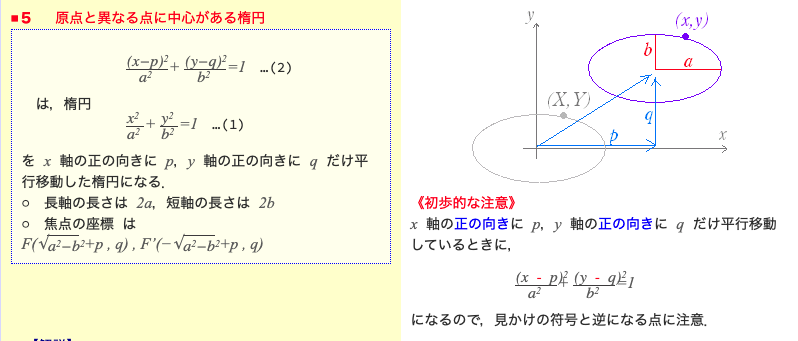

<br>

円の方程式において、「楕円と真円の違い」「円のバイアス」が何を意味するのかを考えると…

- 中心にやってくる、すなわちp=0, q=0
- 楕円ではなく真円になる、すなわちa=1, b=1

ということは、以下のように類推できる

- 中心にやってくる、すなわちp=0, q=0 <font color=blue>← $\vec{x}$ の平均値が0になることに対応している？</font>
- 楕円ではなく真円になる、すなわちa=1, b=1 <font color=blue>← $\vec{x}$ の分散が1になることに対応している？</font>

あとは、SSEのシグマを解いて、実際に計算式を出し、wでくくって係数を出してみると、理解できるかも。ただ、もういいや。なんとなくわかった。もし理解が足りないと感じたときは、もどってこよう。

---

<br>

### 実装



In [66]:
# 各列を標準化
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

<ipython-input-42-a82494299168>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


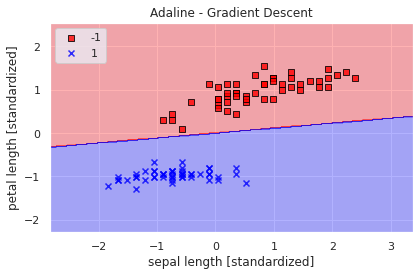

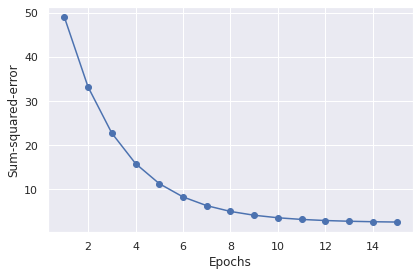

In [67]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

## 大規模データセットを用いた機械学習では確率的勾配降下法を使う

ここまでで説明した、活性化関数Jは、データ全体に対してコスト関数を一回算出していた。これを <font color=red>**バッチ勾配降下法**</font> という。

この場合、 **大域的最小値に一個進むごとに全データを評価する** 必要がある。めちゃくちゃでかいデータセットが来た場合計算コストが高くつくだろう。コスト関数の算出1回につき、全データを計算しなきゃならない。

そこで

### 確率的勾配降下法(stchastic gradient descent)の導入

- 別名１：逐次的勾配降下法(iterative gradient descent)
- 別名２：オンライン勾配降下法(online gradient descent)

ポイントは、 <font color=red>**データ一つごとに重みを更新する**</font> ということ。結果として以下の特徴がある。

- 重みの更新頻度が高いので、通常は収束速度が速い
- その代わり誤差曲面のノイズが大きい。（入力データに対する頑健性が低いということかな？）

ただし、**2点目のある種デメリットにも見える特徴量は、「局所最適解から抜け出しやすい」というメリットにもなる。ただし、非線形コスト関数を使った場合に限るが。**

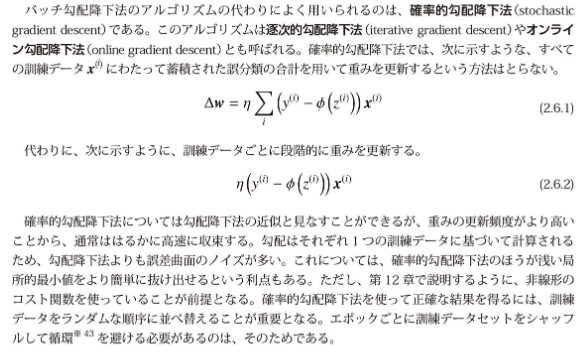

### ミニバッチ勾配降下法（ミニバッチ学習）

- バッチ勾配降下法と確率的（逐次）勾配降下法の間をとったやつ
- ある程度まとまったデータに対して勾配を求めることで、ロバストになる
- 複数データの計算は、for文じゃなくて行列計算で代用できるので高速に計算できる（バッチ勾配降下法でこれが出来ないのは、データがメモリに乗り切らないからかな？）

### 実装（AdalineGD -> AdalineSGD）

※ちなみに、GDはgradient descent, SGDはstochastic gradient descent ね

ポイントは…

1. fitメソッドの改修：データごとに重み更新するように変更
2. partial_fitメソッドの追加：重みの最初期化を行わない訓練処理
3. 収束性確認の改修：訓練データの平均コストとして、エポックごとのコストを算出する
4. shuffleメソッドの追加：確率的勾配降下法のデメリット「循環」を避けるために、各エポック開始前にデータ順序をシャッフルする

<font color=red size=4>※ここで初めて、バッチ数×エポック数＝学習回数という構成になった</font>

In [68]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

<ipython-input-42-a82494299168>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


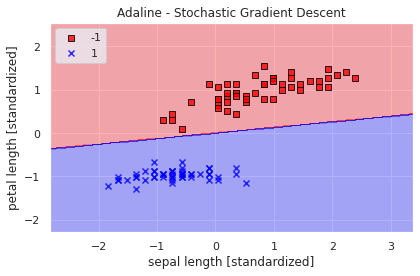

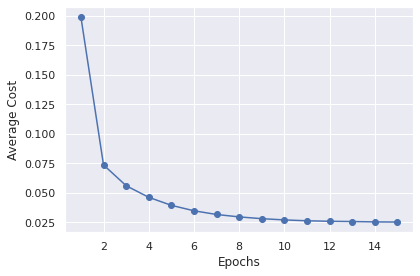

In [69]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

### partial_fit はいつ使うの？

オンライン学習をする場合は、データごとにpartial_fitを呼べばいい。

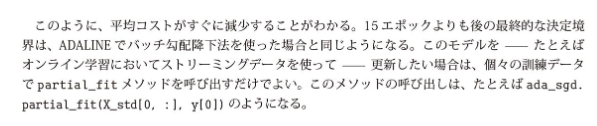

## 本章のまとめ

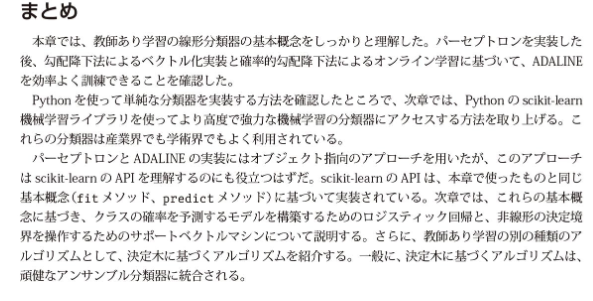